# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Откройте файлы и изучите их

In [1]:
import numpy as np
import pandas as pd

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor
import seaborn as sns
from scipy.stats import kstest
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("/datasets/gold_recovery_full_new.csv")
df_train = pd.read_csv("/datasets/gold_recovery_train_new.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test_new.csv")

In [3]:
print('Общая информация по исходному датасету:')
print('')
df.info()

Общая информация по исходному датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol              

In [4]:
print('Общая информация по тренировочному датасету:')
print('')
df_train.info()

Общая информация по тренировочному датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol         

In [5]:
print('Общая информация по тестовому датасету:')
print('')
df_test.info() 

Общая информация по тестовому датасету:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      

In [6]:
print('Основные характеристики по исходному датасету:')
print('')
df.describe()

Основные характеристики по исходному датасету:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


In [7]:
print('Основные характеристики по тренировочному датасету:')
print('')
df_train.describe()

Основные характеристики по тренировочному датасету:



,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


In [8]:
print('Основные характеристики по тестовому датасету:')
print('')
df_test.describe()

Основные характеристики по тестовому датасету:



,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


In [9]:
print(df.shape, df_train.shape, df_test.shape)

(19439, 87) (14149, 87) (5290, 53)


***ВЫВОД***  

Тренировочная и тестовая выборки разбиты 70:30; в тестовой выбоке нет целевых признаков.

###  Проверка расчета эффективности обогащения

- Вычислим эффективность обогащения на обучающей выборке для признака rougher.output.recovery и сравним с уже имеющимся
- Найдем MAE между нашими расчётами и значением признака

In [10]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

df_train['my_recovery'] = ((C*(F-T))/(F*(C-T)))*100
print('Вычисленная эффективность обогащения:', df_train['my_recovery'].mean())
print('Реальная эффективность обогащения:', df_train['rougher.output.recovery'].mean())
print('MAE:',mean_absolute_error(df_train['my_recovery'], df_train['rougher.output.recovery']))

Вычисленная эффективность обогащения: 82.70450164550293
Реальная эффективность обогащения: 82.70450164550293
MAE: 9.73512347450521e-15


***ВЫВОД***  

Расчет эффективности был проведен корректно по заданной формуле; средняя абсолютная разница между вычисленными значениями и фактическими незначительная.

In [11]:
df_train.drop('my_recovery', axis=1, inplace=True)

### Анализ отсутствующих признаков в тестовой  выборке

Определим какие параметры были пропущены и к какому типу они относятся.

In [12]:
droped_columns = set(df_train.columns) - set(df_test.columns)
print('Отсутсвующие признаки в тестовой выбоке:')
droped_columns

Отсутсвующие признаки в тестовой выбоке:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Итак, отсутсвуют следующие признаки:

- 4 признака черновой концентрации по продуктам на этапе флотации
- 4 признака концентраций по продуктам на этапе первичной очистки
- 4 признака концентраций по продуктам на финальном этапе  


- 4 признака отвальных хвостов по продуктам на на этапе флотации
- 4 признака отвальных хвостов по продуктам после первичной очистки
- 4 признака отвальных хвостов по продуктам на на этапе вторичной очистки
- 4 признака отвальных хвостов по продуктам на финальном этапе  


- 4 признака расчетных характеристик на этапе флотации
- 2 целевых признака

***ВЫВОД***

- 30 из 34 признаков относятся к параметрам продукта
- 4 признака относятся к расчетным характеристикам (информация о реагентах на этапе флотации)
- на всех этапах отсутствует информация об отвальных хвостах
- на всех этапах, кроме вторичной очистки, отсутствует информация о концентраций по продуктам
- отсутсвуют целевые признаки (эффективность обогащения на этапе флотации и на финальном этапе)

### Проведите предобработку данных.

- Посчитаем количество пропусков для каждого датасета и обработаем их
- Выполним проверку на дубликаты и при необходимости обработаем их

#### Обработка пропущенных значений

По условию задачи проекта данные индексируются датой и временем получения информации (признак date) и соседние по времени параметры часто похожи.  
Заполним пропуски методом ffill, который заполняет NaN-ы данными из предыдущей строки.

In [14]:
print('Количество пропусков в исходном датасете:', df.isna().sum().sum())
print('Количество пропусков в тренировочном датасете:', df_train.isna().sum().sum())
print('Количество пропусков в тестовом датасете:', df_test.isna().sum().sum())

Количество пропусков в исходном датасете: 4481
Количество пропусков в тренировочном датасете: 4100
Количество пропусков в тестовом датасете: 90


In [15]:
df = df.ffill(axis=0)
df_train = df_train.ffill(axis=0)
df_test = df_test.ffill(axis=0)

In [16]:
print('Количество пропусков в исходном датасете:', df.isna().sum().sum())
print('Количество пропусков в тренировочном датасете:', df_train.isna().sum().sum())
print('Количество пропусков в тестовом датасете:', df_test.isna().sum().sum())

Количество пропусков в исходном датасете: 0
Количество пропусков в тренировочном датасете: 0
Количество пропусков в тестовом датасете: 0


#### Проверка на дубликаты

In [17]:
print('Количество дубликатов в исходном датасете:', df.duplicated().sum())
print('Количество дубликатов в тренировочном датасете:', df_train.duplicated().sum())
print('Количество дубликатов в тестовом датасете:', df_test.duplicated().sum())

Количество дубликатов в исходном датасете: 0
Количество дубликатов в тренировочном датасете: 0
Количество дубликатов в тестовом датасете: 0


***ВЫВОД***  

Пропуски были успешно заполнены значениями из предыдущих строк; явных дубликатов не обнаружено.

## Анализ данных

### Динамика концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

In [18]:
df_ag = df[['rougher.input.feed_ag',
            'rougher.output.concentrate_ag', 
              'primary_cleaner.output.concentrate_ag', 
              'final.output.concentrate_ag']]
df_ag = df_ag.rename(columns={'rougher.input.feed_ag':'input',
                              'rougher.output.concentrate_ag': 'rougher', 
                              'primary_cleaner.output.concentrate_ag': 'primary_cleaner', 
                              'final.output.concentrate_ag': 'final'})

df_pb = df[['rougher.input.feed_pb',
            'rougher.output.concentrate_pb', 
              'primary_cleaner.output.concentrate_pb', 
              'final.output.concentrate_pb']]
df_pb = df_pb.rename(columns={'rougher.input.feed_pb':'input',
                              'rougher.output.concentrate_pb': 'rougher', 
                              'primary_cleaner.output.concentrate_pb': 'primary_cleaner', 
                              'final.output.concentrate_pb': 'final'})

df_au = df[['rougher.input.feed_au',
            'rougher.output.concentrate_au', 
              'primary_cleaner.output.concentrate_au', 
              'final.output.concentrate_au']]
df_au = df_au.rename(columns={'rougher.input.feed_au':'input',
                              'rougher.output.concentrate_au': 'rougher', 
                              'primary_cleaner.output.concentrate_au': 'primary_cleaner', 
                              'final.output.concentrate_au': 'final'})

In [19]:
print('Концентрация серебра снизилась на:', (100 - df_ag['final'].sum()/df_ag['rougher'].sum()*100).round(2), '%')
print('Концентрация свинца повысилась на:', (df_pb['final'].sum()/df_pb['rougher'].sum()*100 - 100).round(2), '%')
print('Концентрация золота повысилась на:', (df_au['final'].sum()/df_au['rougher'].sum()*100 - 100).round(2), '%')

Концентрация серебра снизилась на: 56.91 %
Концентрация свинца повысилась на: 31.19 %
Концентрация золота повысилась на: 122.92 %


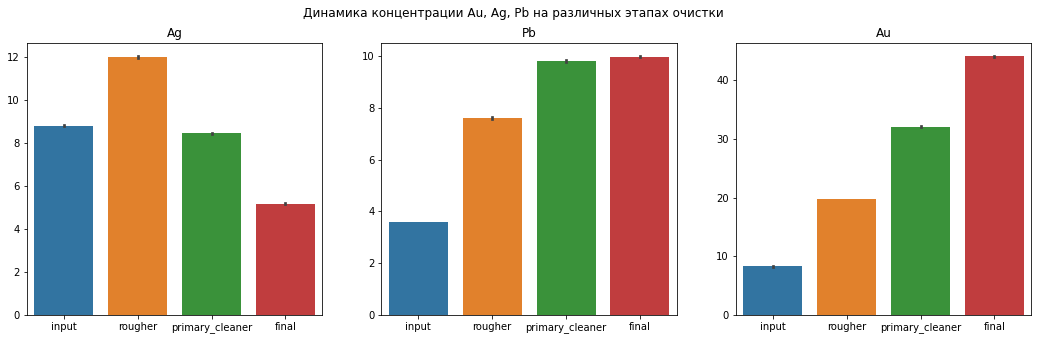

In [20]:
fig, axis = plt.subplots(1,3 , figsize=(18,5))

fig.suptitle('Динамика концентрации Au, Ag, Pb на различных этапах очистки')

sns.barplot(data=df_ag, ax=axis[0]).set(title='Ag')
sns.barplot(data=df_pb, ax=axis[1]).set(title='Pb')
sns.barplot(data=df_au, ax=axis[2]).set(title='Au');

***ВЫВОД***  

- концентрация серебра снижается с каждым этапом
- концентрация свинца и золота возрастает с каждым этапом
- к финальному этапу концентрация серебра снизилась на 56.91%
- к финальному этапу концентрация свинца повысилась на 31.19%
- к финальному этапу концентрация золота повысилась на 122.92%

### Сравните распределения размеров гранул

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках.

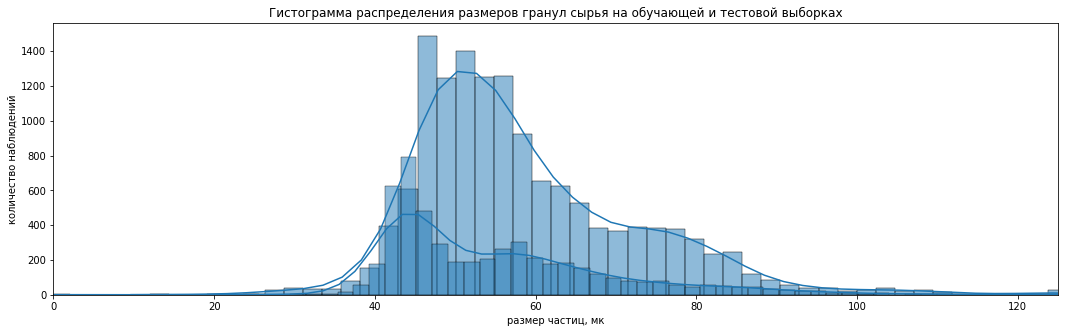

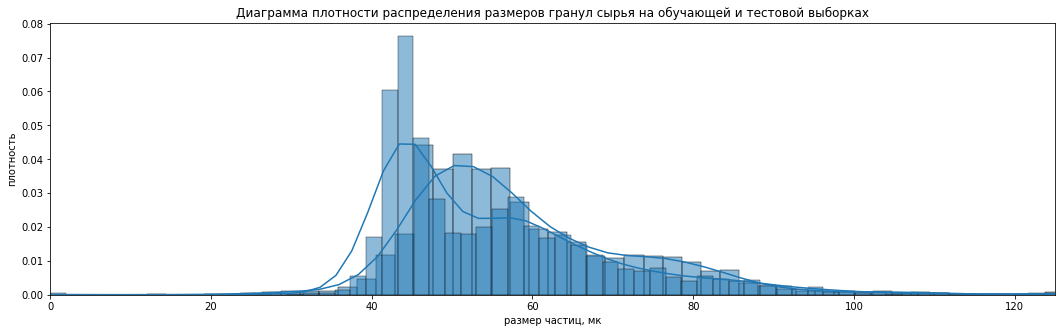

In [21]:
plt.figure(figsize=(18,5))
plt.subplot(sns.histplot(data=df_train['rougher.input.feed_size'], bins=200, kde=True))
plt.subplot(sns.histplot(data=df_test['rougher.input.feed_size'], bins=200, kde=True))
plt.xlim(0,125)
plt.title("Гистограмма распределения размеров гранул сырья на обучающей и тестовой выборках")
plt.xlabel("размер частиц, мк")
plt.ylabel("количество наблюдений")

plt.figure(figsize=(18,5))
plt.subplot(sns.histplot(data=df_train['rougher.input.feed_size'], bins=200, stat='density', common_norm=False, kde=True))
plt.subplot(sns.histplot(data=df_test['rougher.input.feed_size'], bins=200, stat='density', common_norm=False, kde=True))
plt.xlim(0,125)
plt.title("Диаграмма плотности распределения размеров гранул сырья на обучающей и тестовой выборках")
plt.xlabel("размер частиц, мк")
plt.ylabel("плотность");

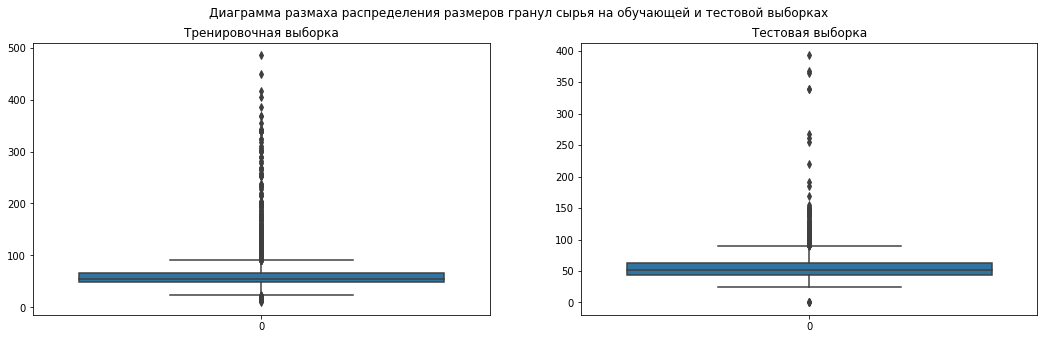

In [22]:
fig, axis = plt.subplots(1,2 , figsize=(18,5))
plt.suptitle('Диаграмма размаха распределения размеров гранул сырья на обучающей и тестовой выборках')
sns.boxplot(data=df_train['rougher.input.feed_size'], ax=axis[0]).set(title='Тренировочная выборка');
sns.boxplot(data=df_test['rougher.input.feed_size'], ax=axis[1]).set(title='Тестовая выборка');

In [23]:
print(df_train['rougher.input.feed_size'].describe())
df_test['rougher.input.feed_size'].describe()

count    14149.000000
mean        60.239856
std         23.005310
min          9.659576
25%         48.966751
50%         55.269784
75%         66.007526
max        484.967466
Name: rougher.input.feed_size, dtype: float64


count    5290.000000
mean       55.952754
std        19.080334
min         0.046369
25%        43.906504
50%        50.846843
75%        62.451165
max       392.494040
Name: rougher.input.feed_size, dtype: float64

***Вывод:*** исходя из гистограмме и диаграмме плотностинельзя доконца быть уверенными, что распределения имеют одну природу; на диагрмме размаха видно, что в обеих выборках присутвует множество выбросов; среднии и медианные значения незначительно отличаются. 

#### Критерий Колмогорова-Смирнова

Проверим гипотезы о равенстве распределений с помощью теста Колмогорова-Смирнова. Идея критерия Колмогорова — Смирнова — сравнить кумулятивные распределения двух групп. В частности, статистика теста Колмогорова — Смирнова представляет собой максимальную абсолютную разницу между двумя кумулятивными распределениями.

H_0: распределения размеров гранул сырья на обучающей и тестовой выборках равны  
H_1: распределения размеров гранул сырья на обучающей и тестовой выборках не равны

In [24]:
alpha = 0.05

results = kstest(df_train['rougher.input.feed_size'], df_test['rougher.input.feed_size'])
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.1997046130555955e-213
Отвергаем нулевую гипотезу


***Вывод:*** тест Колмогорова — Смирнова показал, что распределения не равны; однако, надо принять во внимания факт сильной зашумленности выборок.

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

In [25]:
df_input = df[['rougher.input.feed_ag', 
                   'rougher.input.feed_pb', 
                   'rougher.input.feed_sol', 
                   'rougher.input.feed_au']].sum(axis=1)
df_output_rougher = df[['rougher.output.concentrate_pb', 
                   'rougher.output.concentrate_ag', 
                   'rougher.output.concentrate_sol', 
                   'rougher.output.concentrate_au']].sum(axis=1)
df_output_final = df[['final.output.concentrate_pb', 
                   'final.output.concentrate_ag', 
                   'final.output.concentrate_sol', 
                   'final.output.concentrate_au']].sum(axis=1)

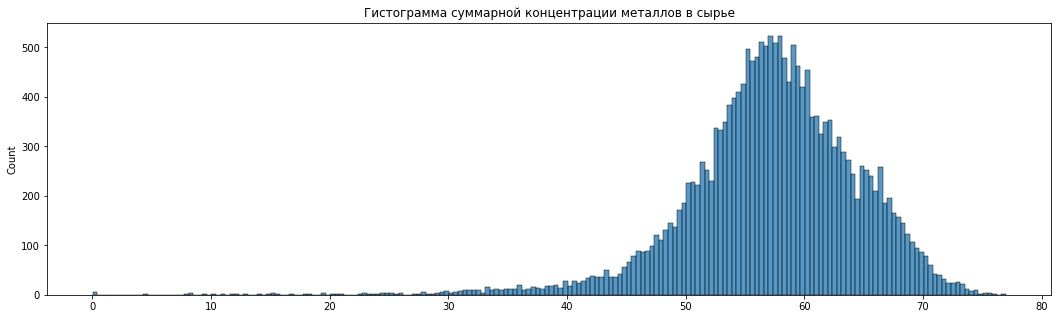

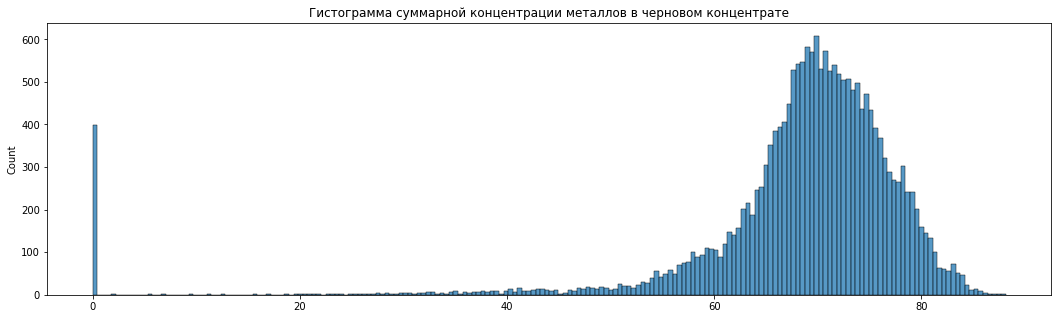

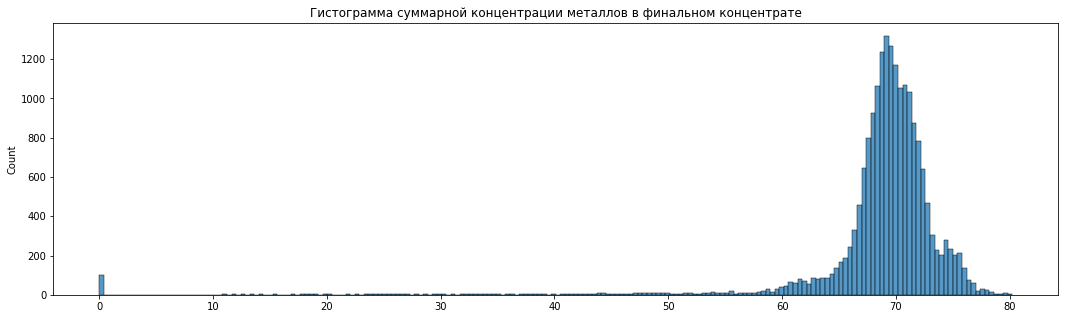

In [26]:
plt.figure(figsize=(18,5))
plt.subplot(sns.histplot(data=df_input, bins=200))
plt.title("Гистограмма cуммарной концентрации металлов в сырье")

plt.figure(figsize=(18,5))
plt.subplot(sns.histplot(data=df_output_rougher, bins=200))
plt.title("Гистограмма cуммарной концентрации металлов в черновом концентрате")

plt.figure(figsize=(18,5))
plt.subplot(sns.histplot(data=df_output_final, bins=200))
plt.title("Гистограмма cуммарной концентрации металлов в финальном концентрате");

Наблюдаем аномальные пики в районе нуля; удалим аномалии т.к. не факт, что остальные признаки верные.

In [27]:
df_train = df_train.loc[(df_train['rougher.input.feed_ag'] > 1)&
                          (df_train['rougher.input.feed_pb']> 1)&
                          (df_train['rougher.input.feed_sol']> 1)&
                          (df_train['rougher.input.feed_au']> 1)&
                          (df_train['rougher.output.concentrate_pb']> 1)&
                          (df_train['rougher.output.concentrate_ag']> 1)&
                          (df_train['rougher.output.concentrate_sol']> 1)&
                          (df_train['rougher.output.concentrate_au']> 1)&
                          (df_train['final.output.concentrate_pb']> 1)&
                          (df_train['final.output.concentrate_ag']> 1)&
                          (df_train['final.output.concentrate_sol']> 1)&
                          (df_train['final.output.concentrate_au']> 1)]
df_test = df_test.loc[(df_test['rougher.input.feed_ag'] > 1)&
                          (df_test['rougher.input.feed_pb']> 1)&
                          (df_test['rougher.input.feed_sol']> 1)&
                          (df_test['rougher.input.feed_au']> 1)]
print(df_train.shape)
df_test.shape

(13542, 87)


(5276, 53)

## Модель

Прежде чем приступать к обучению моделей, сделаем следующее:  

    - удалим столбец "data" из обеих выборок
    - добавим в тестовую выборку целевые признаки
    - удалим из тренировочной выборки те признаки, которых нет в тестовой
    - выделим признаки и целевой признак
    

In [28]:
df_temp = df[['date', 'rougher.output.recovery', 'final.output.recovery']]
df_test = df_test.merge(df_temp, how='left', on='date')
df_test.drop('date', axis=1, inplace=True)
df_train = df_train.drop(set(df_train.columns)-set(df_test.columns), axis=1)

In [29]:
print(df_train.shape)
df_test.shape

(13542, 54)


(5276, 54)

In [30]:
features_train_rougher = df_train.filter(regex='^rougher',axis=1)
features_train_rougher = features_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_train_rougher = df_train['rougher.output.recovery']
features_test_rougher = df_test.filter(regex='^rougher',axis=1)
features_test_rougher = features_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = df_test['rougher.output.recovery']

features_train_final = df_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_train_final = df_train['final.output.recovery']
features_test_final = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
target_test_final = df_test['final.output.recovery']

### Напишите функцию для вычисления итоговой sMAPE.

In [31]:
def sMAPE(y_true,y_pred):
    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
    return error

In [32]:
def final_sMAPE(sMAPE_rougher,sMAPE_final):
    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

In [33]:
scorer = make_scorer(sMAPE,greater_is_better=False)

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

Для обучения возьмем регрессионные модели дерева решений и случайного леса. Поберем для них оптимальные параметры.

In [34]:
#автоматический подбор параметров для DecisionTreeRegressor
parameters = {'max_depth' : range(1,10)}

model_tree = DecisionTreeRegressor(random_state=12345)

grid_rougher_tree = GridSearchCV(model_tree, param_grid = parameters, scoring=scorer, cv=5)
grid_rougher_tree.fit(features_train_rougher,target_train_rougher)
print('Лучшая модель для этапа флотации:', grid_rougher_tree.best_estimator_)
print('sMAPE:', grid_rougher_tree.best_score_)
grid_final_tree = GridSearchCV(model_tree, param_grid = parameters, scoring=scorer, cv=5)
grid_final_tree.fit(features_train_final,target_train_final)
print('Лучшая модель для финального этапа:', grid_final_tree.best_estimator_)
print('sMAPE:', grid_final_tree.best_score_)

Лучшая модель для этапа флотации: DecisionTreeRegressor(max_depth=3, random_state=12345)
sMAPE: -6.8792164430124725
Лучшая модель для финального этапа: DecisionTreeRegressor(max_depth=2, random_state=12345)
sMAPE: -9.06431193101207


In [35]:
print('Итоговое sMAPE для решающего дерева:',final_sMAPE(grid_rougher_tree.best_score_, grid_final_tree.best_score_).mean())

Итоговое sMAPE для решающего дерева: -8.51803805901217


In [37]:
#автоматический подбор параметров для RandomForestRegressor
parameters = {'max_depth' : range(1,20,2), 'n_estimators' : range(1,20,2)}

model_forest = RandomForestRegressor(random_state=12345)

grid_rougher_forest = GridSearchCV(model_forest, param_grid = parameters, scoring=scorer, cv=5)
grid_rougher_forest.fit(features_train_rougher,target_train_rougher)
print('Лучшая модель для этапа флотации:', grid_rougher_forest.best_estimator_)
print('sMAPE:', grid_rougher_forest.best_score_)

grid_final_forest = GridSearchCV(model_forest, param_grid = parameters,scoring=scorer, cv=5)
grid_final_forest.fit(features_train_final,target_train_final)
print('Лучшая модель для финального этапа:', grid_final_forest.best_estimator_)
print('sMAPE:', grid_final_forest.best_score_) 

Лучшая модель для этапа флотации: RandomForestRegressor(max_depth=5, n_estimators=7, random_state=12345)
sMAPE: -6.531822177404663
Лучшая модель для финального этапа: RandomForestRegressor(max_depth=3, n_estimators=7, random_state=12345)
sMAPE: -8.945130585791894


In [38]:
print('Итоговое sMAPE для случайного леса:',final_sMAPE(grid_rougher_forest.best_score_, grid_final_forest.best_score_).mean())

Итоговое sMAPE для случайного леса: -8.341803483695086


***Вывод***  
Случайный лес работает лучше - метрика sMAPE меньше. Для тестирования выбираем эту модель.

In [39]:
rougher_test = grid_rougher_forest.predict(features_test_rougher)
final_test = grid_final_forest.predict(features_test_final)
print('Итоговое sMAPE на тестовой выборке:',final_sMAPE(sMAPE(target_test_rougher,rougher_test),sMAPE(target_test_final,final_test)))

Итоговое sMAPE на тестовой выборке: 9.062606545246549


Проверим модель на адекватность.

In [40]:
dummy_model_rougher = DummyRegressor(strategy="mean")
dummy_model_final = DummyRegressor(strategy="mean")
dummy_model_rougher.fit(features_train_rougher,target_train_rougher)
dummy_model_final.fit(features_train_final,target_train_final)
test_predictions_rougher = dummy_model_rougher.predict(features_test_rougher)
test_predictions_final = dummy_model_final.predict(features_test_final)

print('Итоговое sMAPE для DummyRegressor:',final_sMAPE(sMAPE(target_test_rougher,test_predictions_rougher),
                                                       sMAPE(target_test_final,test_predictions_final)))

Итоговое sMAPE для DummyRegressor: 9.62316186609295


***ВЫВОД***  
Наша модель адекватна, работает лучше, чем dummy регрессор.